In [36]:
# -*- coding: utf-8 -*-
"""
Created on Sat Feb 16 20:52:40 2019

@author: natasha
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

dataset=pd.read_csv("Telco-Churn.csv")
dataset_copy=pd.read_csv("Telco-Churn.csv")
#dataset.info()
#Convert total charges to a numeric value

In [37]:
dataset_copy['TotalCharges']=pd.to_numeric(dataset_copy['TotalCharges'],errors='coerce')
#we have 11 missing values in the total charges column now, in the total charges column.
#Also on inspection it was found that they had a tenure of 0. This data is not really useful to us, since their total charges are not available to us, and the tenure itself is 0.
#Dropping all null values
#dataset_copy.dropna(how='any',inplace=True)
numerical_cols=['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']
categorical_cols=[ 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']
#DataVisualization
#sns.boxplot(x='Churn',y='MonthlyCharges',data=dataset_copy)
#sns.boxplot(x='MonthlyCharges',data=dataset_copy)
#sns.boxplot(x='Churn',y='TotalCharges',data=dataset_copy)

data_cont = ['tenure','MonthlyCharges', 'TotalCharges']
data_cat = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
            'PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport','StreamingTV','StreamingMovies',
            'Contract', 'PaperlessBilling','PaymentMethod']


In [38]:
dataset_copy.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

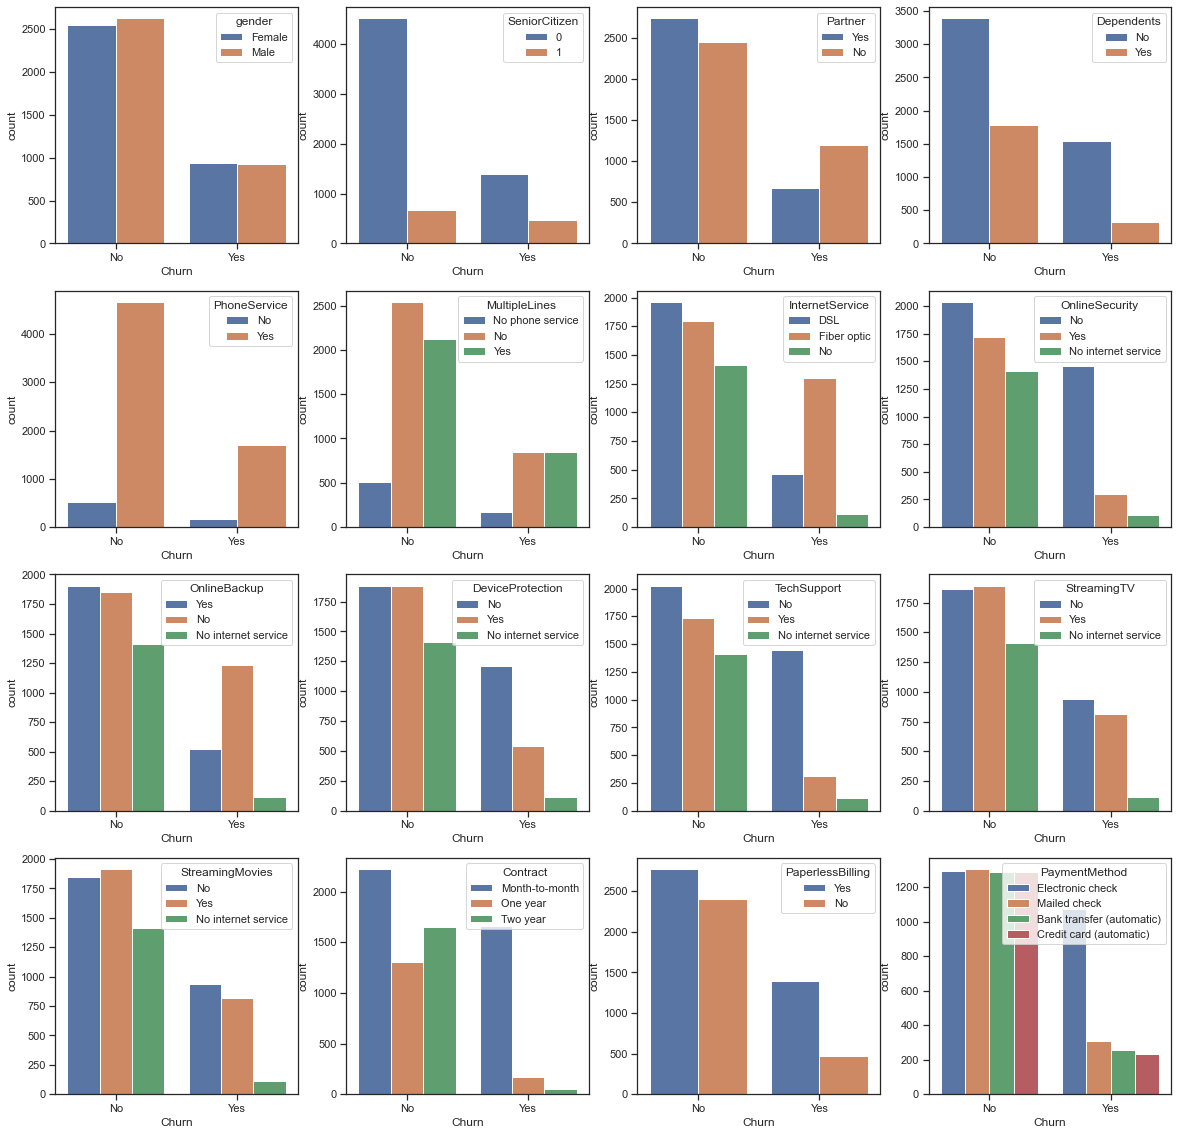

In [39]:
#visualization code from https://github.com/MET4LHE4D/Telco-Customer-Churn-Prediction-Using-ANN/blob/master/CustomerChurnPrediction.ipynb

fig , ax = plt.subplots(4,4,figsize=(20,20))
sns.set(style="ticks", color_codes=True)
for axis,col in zip(ax.flat,data_cat):
    sns.countplot(x=dataset_copy["Churn"],hue=dataset_copy[col],ax=axis)
dataset_copy=dataset_copy.drop('customerID',axis=1)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder=LabelEncoder()
for cols in data_cat:
    dataset_copy.loc[:,cols] = LabelEncoder().fit_transform(dataset_copy.loc[:,cols])

In [40]:
onehotencoder = OneHotEncoder(sparse=False)
data_categorical = onehotencoder.fit_transform(dataset_copy[data_cat])
from sklearn.preprocessing import StandardScaler
standard_scaler=StandardScaler()
data_numeric=standard_scaler.fit_transform(dataset_copy[data_cont])


In [41]:
features=np.concatenate([data_categorical,data_numeric],axis=1)
target=dataset_copy.iloc[:,19:].values
target=label_encoder.fit_transform(target)



In [42]:
import warnings

warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)


y_pred=classifier.predict(X_test)

conf_matrix=confusion_matrix(y_test,y_pred)
conf_matrix


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [12]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)

NameError: name 'y_pred' is not defined

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense
classifier=Sequential()
#followed a random method for setting the output dim (num of input variables + no of final output variables(one here since its a binary classification,divided by two))
#classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu',input_dim=44))
#classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu'))
#classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
#classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

classifier.add(Dense(units = 6, input_dim = np.shape(X_train)[1], kernel_initializer = 'uniform', activation = 'relu')) 
# Second HL
classifier.add(Dense(units = 8, input_dim = 12, kernel_initializer = 'uniform', activation = 'relu'))
# Output Layer
classifier.add(Dense(units = 1, kernel_initializer = 'normal', activation = 'sigmoid')) 
classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
#classifier.add(Dense(units=6,input_dim=46,output_dim=10,init='uniform',activation='relu'))
#classifier.add(Dense(output_dim=10,init='uniform',activation='relu'))
#classifier.add(Dense(output_dim=1,init='uniform',activation='sigmoid'))
#classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
classifier.fit(X_train,y_train,batch_size=10,epochs=100)
y_pred_neural=classifier.predict(X_test)

Epoch 1/100


UnimplementedError:  Cast string to float is not supported
	 [[node binary_crossentropy/Cast (defined at <ipython-input-13-dd0d9bdcd38b>:22) ]] [Op:__inference_train_function_720]

Function call stack:
train_function


In [ ]:
###############################################################################

# ANN Predictions

###############################################################################

# Predict
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score, roc_auc_score

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix,  annot=True, fmt ="d"); #xticklabels="Chunk", yticklabels="No Chunk",
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
print (classification_report(y_test, y_pred))